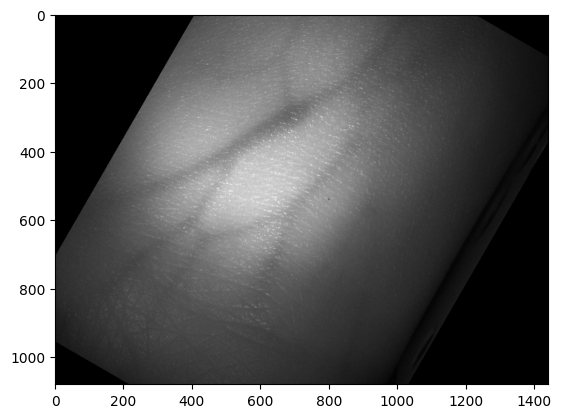

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

image = cv2.imread('/content/hand (66)60 deg rotated .png', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.axis('off')

0.005656242370605469


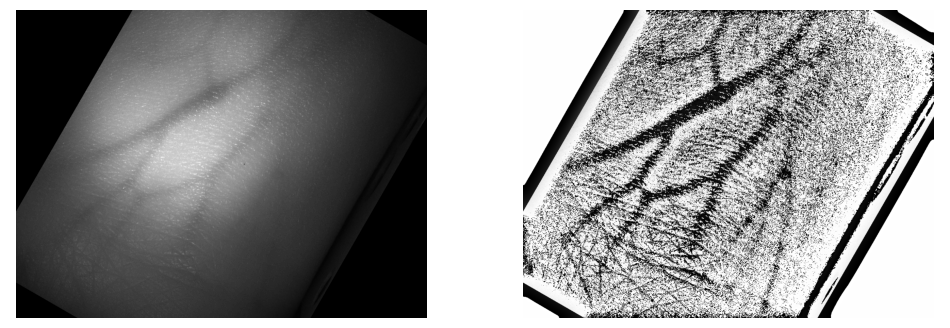

In [ ]:
begin = time.time()
img_smoothed = cv2.blur(image, (81,81))
inverted = cv2.bitwise_not(img_smoothed)

output = inverted + image + 2
output = cv2.bitwise_not(output)

end = time.time()
print(end - begin)

# plot the results
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
#plt.title('Original')
plt.axis('equal')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(output, cmap='gray')
#plt.title('Enhanced')
plt.axis('equal')
plt.axis('off')

# show the plot
plt.show()

In [ ]:
def getVeins(image):
  img_smoothed = cv2.blur(image, (81,81))
  inverted = cv2.bitwise_not(img_smoothed)

  output = inverted + image + 2
  output = cv2.bitwise_not(output)

  return output

In [ ]:
import os
import cv2
from google.colab import drive
import numpy as np
from matplotlib import pyplot as plt
import time

def main():
    drive.mount('/content/drive')

    # specify path to the input folder having images
    shared_folder = '/content/drive/MyDrive/input'
    image_files = [f for f in os.listdir(shared_folder) if os.path.isfile(os.path.join(shared_folder, f))]
    output_dir_colab = '/content/output_images'
    os.makedirs(output_dir_colab, exist_ok=True)

    aver_time = 0
    count = 0
    # iterate through images
    for image_file in image_files:
        count = count+1
        image_path = os.path.join(shared_folder, image_file)
        original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

        if original_image is not None:
            begin = time.time()
            processed_image = getVeins(original_image) # apply vein enhancement
            end = time.time()
            aver_time += (end - begin)

            composite_image = np.concatenate((original_image, processed_image), axis=1)

            # add titles
            title = f"Original | Processed"
            cv2.putText(composite_image, title, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

            # save the image to ouput dir
            output_path = os.path.join(output_dir_colab, f"composite_{image_file}")
            cv2.imwrite(output_path, composite_image)

    print(f"Time taken to extract veins on average: {aver_time / count}")

    # zipping
    zip_file_path = '/content/processed_images.zip'
    os.system(f"zip -r {zip_file_path} {output_dir_colab}")

    # save zipped file to drive
    drive_output_path = '/content/drive/MyDrive/processed_images.zip'
    os.rename(zip_file_path, drive_output_path)

if __name__ == "__main__":
    main()